In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/ozempic_simple.csv')
df

,age_group,bmi_category,months,percent_weight_loss
0,20-40,obese,3,-8.2
1,40-60,obese,3,-7.1
2,60+,obese,3,-6.4
3,20-40,overweight,6,-12.5
4,40-60,overweight,6,-11.1
5,60+,overweight,6,-9.5
6,20-40,severe_obese,12,-15.8
7,40-60,severe_obese,12,-14.2
8,60+,severe_obese,12,-12.0


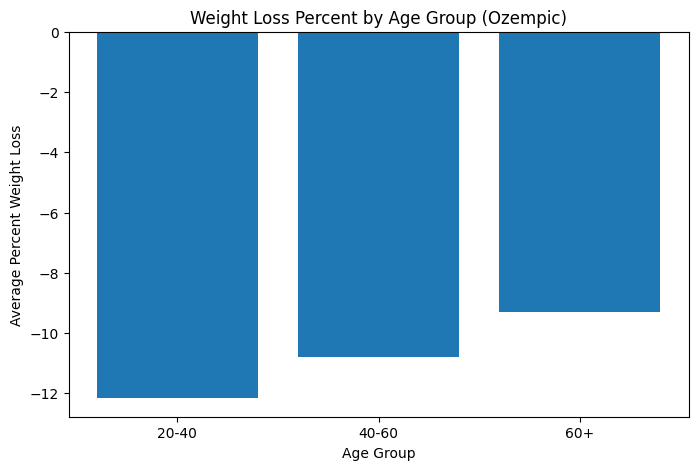

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# טעינת הנתונים
df = pd.read_csv('/content/drive/MyDrive/ozempic_simple.csv')

# יצירת ממוצע אחוז ירידה לכל קבוצת גיל
avg_by_age = df.groupby('age_group')['percent_weight_loss'].mean()

# גרף
plt.figure(figsize=(8,5))
plt.bar(avg_by_age.index, avg_by_age.values)
plt.xlabel('Age Group')
plt.ylabel('Average Percent Weight Loss')
plt.title('Weight Loss Percent by Age Group (Ozempic)')
plt.show()

In [15]:
import pandas as pd
import plotly.express as px

# טעינת הנתונים
df = pd.read_csv('/content/drive/MyDrive/ozempic_simple.csv')

# לחשב ממוצע ירידה במשקל לפי קבוצת גיל
avg_by_age = df.groupby('age_group')['percent_weight_loss'].mean().reset_index()

# גרף אינטראקטיבי
fig = px.bar(
    avg_by_age,
    x='age_group',
    y='percent_weight_loss',
    title="Average Weight Loss (%) by Age Group - Ozempic",
    labels={'age_group': 'Age Group', 'percent_weight_loss': 'Average % Weight Loss'},
    text='percent_weight_loss'
)

fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig.update_layout(yaxis_title="Average Weight Loss (%)")
fig.show()

In [16]:
import pandas as pd
import plotly.express as px

# טעינה
df = pd.read_csv('/content/drive/MyDrive/ozempic_simple.csv')

# סינון רק ל-6 חודשים
df6 = df[df['months'] == 6]

# ממוצע לפי קבוצת גיל
avg6 = df6.groupby('age_group')['percent_weight_loss'].mean().reset_index()

# גרף אינטראקטיבי
fig = px.bar(
    avg6,
    x='age_group',
    y='percent_weight_loss',
    title="Average Weight Loss (%) After 6 Months - Ozempic",
    text='percent_weight_loss',
    labels={'age_group':'Age Group', 'percent_weight_loss':'Weight Loss (%)'}
)

fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig.update_layout(yaxis_title="Weight Loss (%)")
fig.show()